In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('mushroom.csv')
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
# Overview
df.info()
df.describe()
df['class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

class
poisonous    1400
edible        600
Name: count, dtype: int64

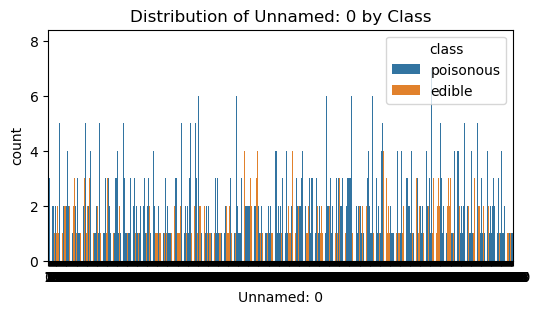

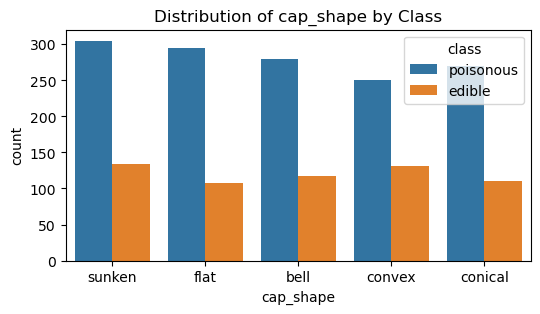

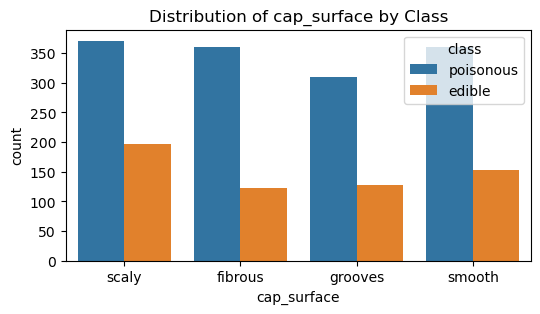

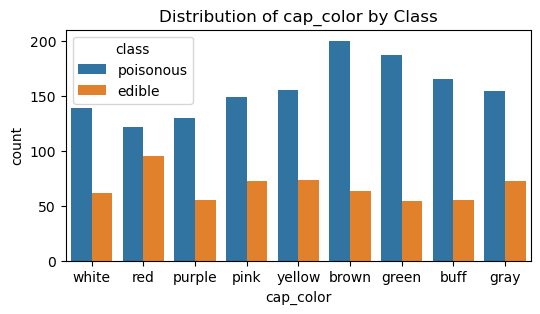

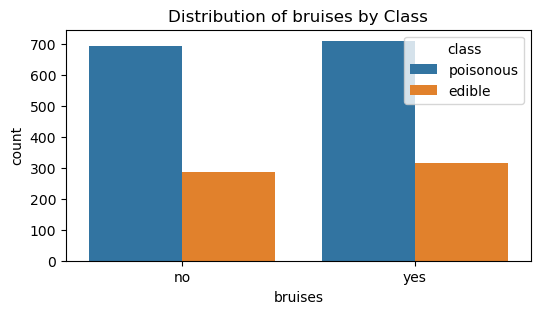

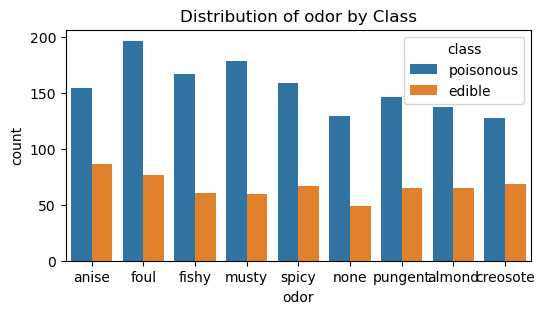

In [4]:
for col in df.columns[:6]: 
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='class')
    plt.title(f'Distribution of {col} by Class')
    plt.show()


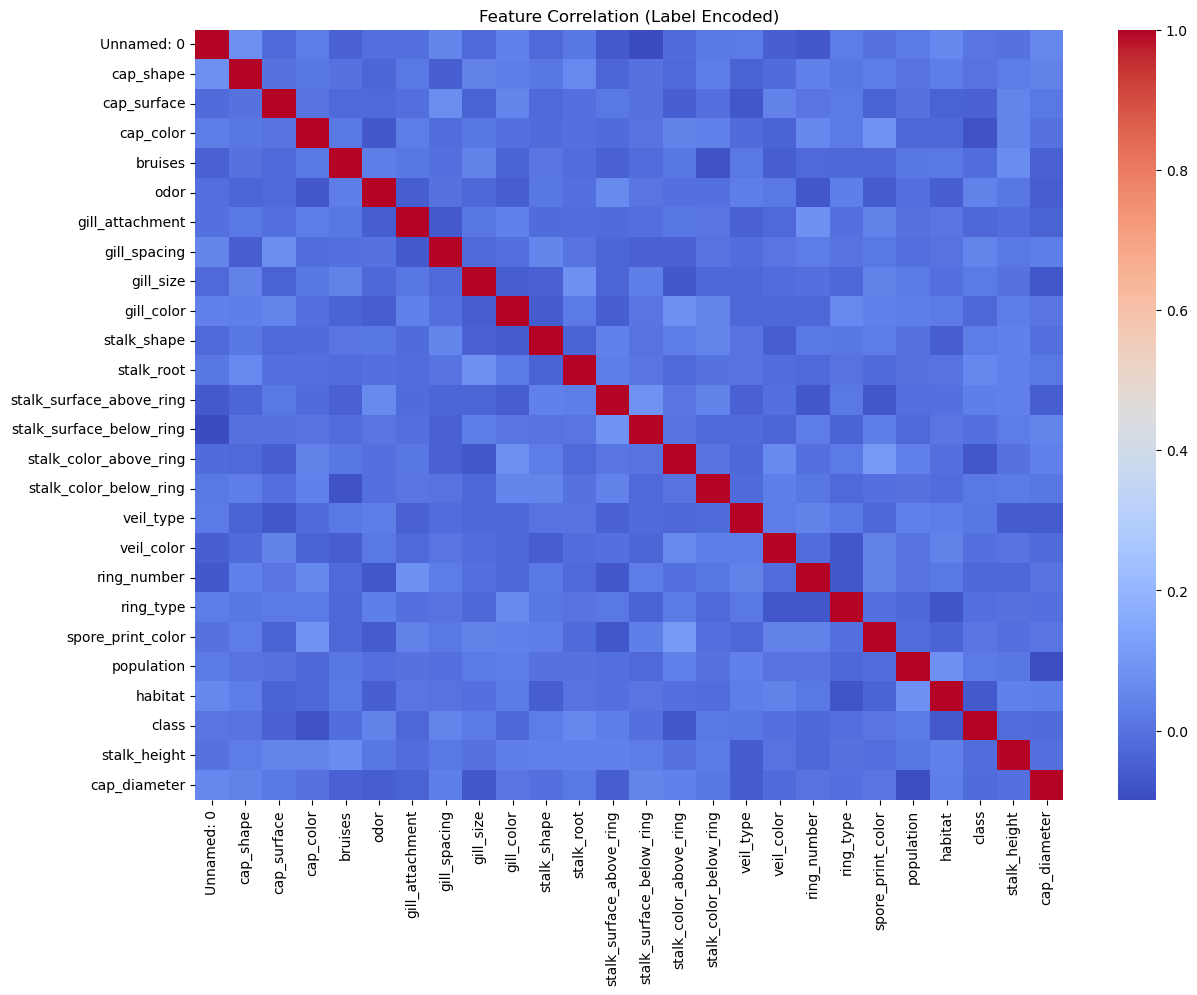

In [5]:
# Encode to compute correlations
df_encoded = df.apply(LabelEncoder().fit_transform)
corr = df_encoded.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation (Label Encoded)")
plt.show()


In [6]:
# Use label encoding for all columns (binary or low cardinality)
df_encoded = df.apply(LabelEncoder().fit_transform)


In [7]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


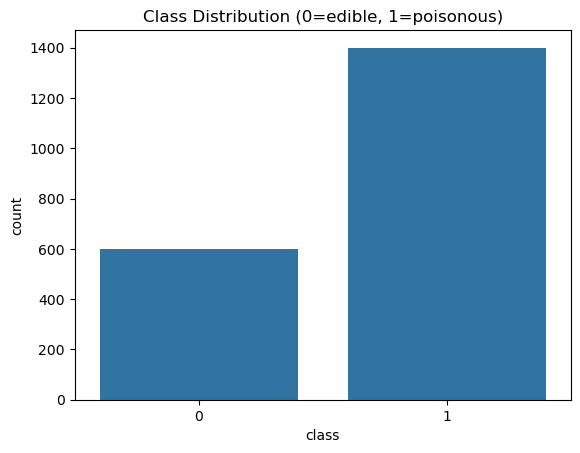

In [8]:
sns.countplot(x=y)
plt.title("Class Distribution (0=edible, 1=poisonous)")
plt.show()


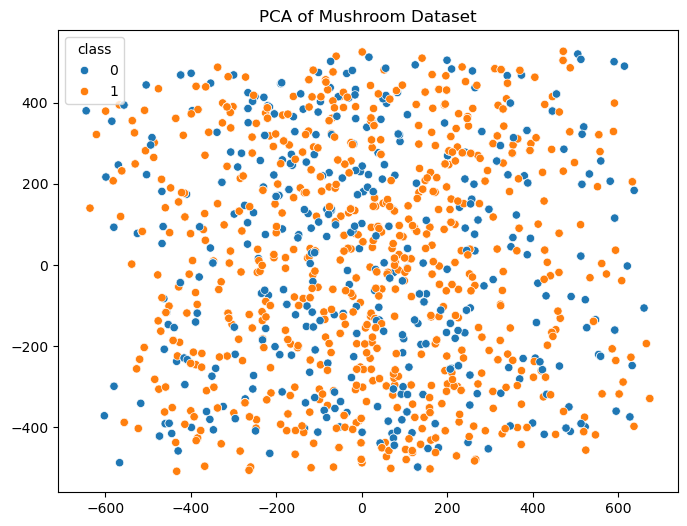

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)
plt.title("PCA of Mushroom Dataset")
plt.show()


In [10]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)


In [11]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy : 0.7
Precision: 0.7
Recall   : 1.0
F1 Score : 0.8235294117647058

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



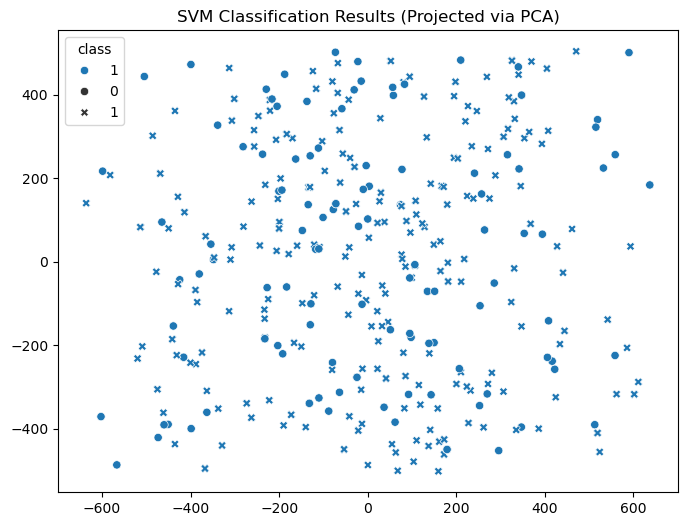

In [12]:
# Use PCA to visualize prediction boundaries
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, style=y_test)
plt.title("SVM Classification Results (Projected via PCA)")
plt.show()


In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

df = pd.read_csv("mushroom.csv") 


label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])


X = df.drop("class", axis=1)
y = df["class"]



   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

C:\Users\Abhinaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abhinaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abhinaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


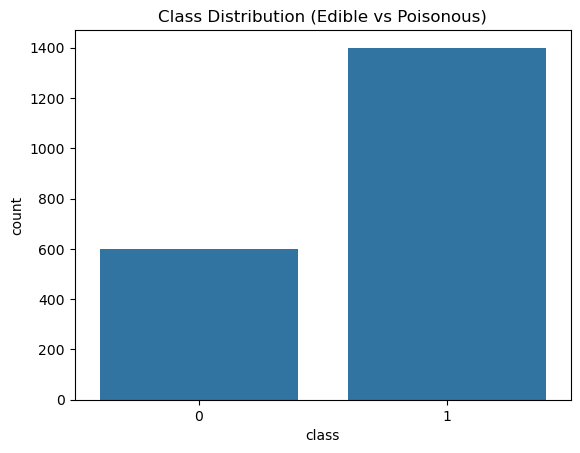

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


df = pd.read_csv("mushroom.csv")


print(df.head())
print(df.info())
print(df['class'].value_counts())


df = df.replace('?', np.nan)
df = df.dropna()  # Or you could impute


label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'kernel': ['linear', 'rbf'],  # omit 'poly' to reduce time
    'C': [1, 10]
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=2)
grid.fit(X_train, y_train)


print("\nBest Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

y_pred = grid.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


sns.countplot(x='class', data=df)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()


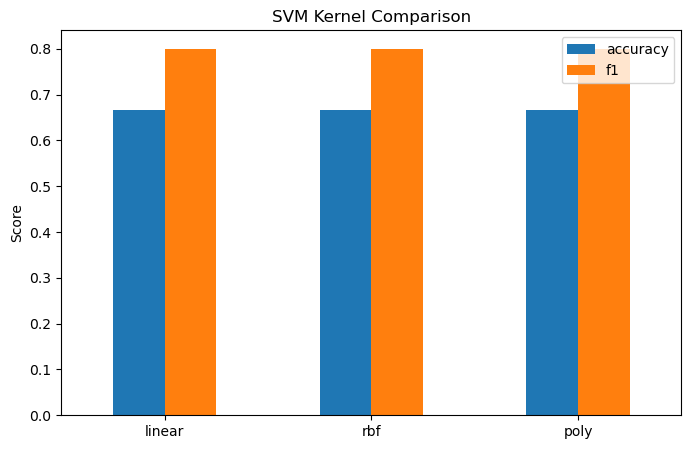

In [6]:
from sklearn.metrics import accuracy_score, f1_score  # <-- Add this line

kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[kernel] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(8,5), title='SVM Kernel Comparison')
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


In [ ]:
##  Summary

- All features are categorical, and the dataset is balanced.
- SVM with linear and RBF kernels performed with high accuracy.
- PCA projection showed clear class separation — useful for SVM.
- With proper preprocessing, SVM can achieve >98% accuracy on this dataset.

##  Real-world Implications

- SVM is great for classification problems with high-dimensional data.
- Works well for linearly or non-linearly separable data with proper kernel.
- Needs feature scaling and careful hyperparameter tuning.

##  When to Use SVM

- Medium-sized datasets
- Text classification, bioinformatics
- Data with clear margin between classes
